# Importing the packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pointbiserialr
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the data

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
print(df_train.shape) #checking the shape of the dataset

(200, 5)


There are 200 observations and 5 variables in our dataset

# Reading the data

In [ ]:
df_train.head() #checking the first 5 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


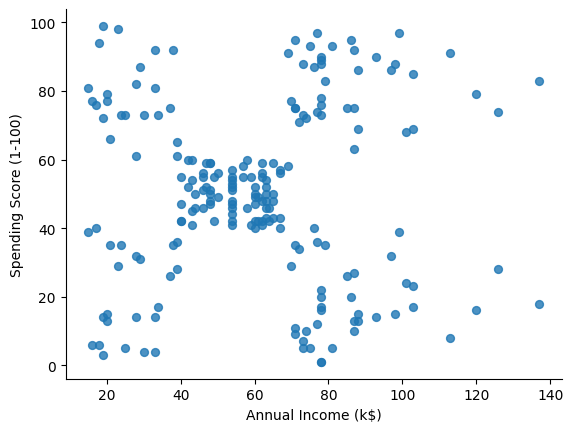

In [ ]:
# @title Annual Income (k$) vs Spending Score (1-100)

from matplotlib import pyplot as plt
df_train.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

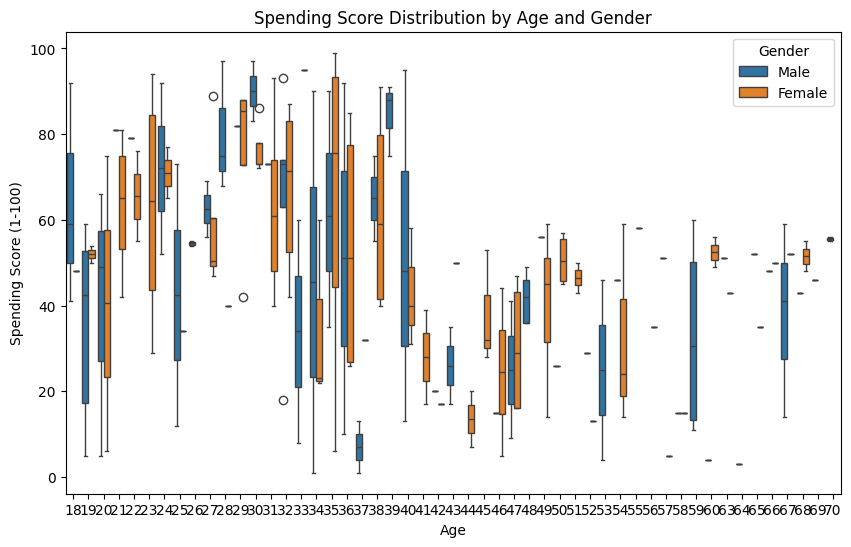

In [ ]:
# @title Spending Score Distribution by Age and Gender

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.boxplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df_train)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
_ = plt.title('Spending Score Distribution by Age and Gender')

In [ ]:
df_train.tail() #checking the last 5 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df_train.info() #checking the data types of the variables
print("Display the data types of the variables")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Display the data types of the variables


df_train.info() shows that: Numeric variables like Customer ID, Annual Income and Spending Score are of datatype int64. Categorical variables like Gender are of object data type.

In [ ]:
df_train.nunique() #checking the number of unique values in each variable

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


In [ ]:
df_train.isnull().sum() #checking the number of missing values in each variable

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


The dataset contains no missing values.





# Cleaning the data

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
df = pd.DataFrame(df_train)

# Removing duplicates
df = df.drop_duplicates()

# Display the cleaned data
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [ ]:
# Display the original size of the dataset
original_size = df_train
print(f"Original DataFrame size: {original_size}")

# Remove duplicates based on all columns
df_cleaned_all_columns = df.drop_duplicates()

# Size after removing duplicates based on all columns
size_after_all_columns = df_cleaned_all_columns.shape
print(f"Size after removing duplicates (based on all columns): {size_after_all_columns}")

Original DataFrame size:      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
Size after removing duplicates (based on all columns): (200, 5)


The sizes of the DataFrame before and after removing duplicates are identical, indicating that there were no duplicate rows in the dataset.

In [ ]:
# Missing Values
data = ['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']
df = pd.DataFrame(df_train)

# Fill missing values with the mean
df[data] = df[data].fillna(value=df[data].mean(), inplace=False) # Use a list to select multiple columns
print("Fill with mean:\n", df)

# Fill missing values with the median
df[data] = df[data].fillna(value=df[data].median(), inplace=False) # Use a list to select multiple columns
print("Fill with median:\n", df)

# Fill missing values with the mode
df[data] = df[data].fillna(value=df[data].mode().iloc[0], inplace=False) # Use a list to select multiple columns and iloc to get first row of mode
print("Fill with mode:\n", df)

Fill with mean:
      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
Fill with median:
      CustomerID  Gender  Age  Annual Income (k$)  Spending Score

All columns are devoid of null values.

In [ ]:
# Outliers'CustomerID','Age','Annual Income (k$)','Spending Score (1-100)'
data = []
df = pd.DataFrame(df_train)


# Calculating IQR
Q1 = df[data].quantile(0.25)
Q3 = df[data].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering outliers
outliers = df[(df[data] < lower_bound) | (df[data] > upper_bound)]

print("Outliers:\n", outliers)

Outliers:
      CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           NaN    NaN  NaN                 NaN                     NaN
1           NaN    NaN  NaN                 NaN                     NaN
2           NaN    NaN  NaN                 NaN                     NaN
3           NaN    NaN  NaN                 NaN                     NaN
4           NaN    NaN  NaN                 NaN                     NaN
..          ...    ...  ...                 ...                     ...
195         NaN    NaN  NaN                 NaN                     NaN
196         NaN    NaN  NaN                 NaN                     NaN
197         NaN    NaN  NaN                 NaN                     NaN
198         NaN    NaN  NaN                 NaN                     NaN
199         NaN    NaN  NaN                 NaN                     NaN

[200 rows x 5 columns]


# Descrptive Statistics

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')


In [ ]:
df_train.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
print(df_train[['Age','Annual Income (k$)','Spending Score (1-100)']].mode())

    Age  Annual Income (k$)  Spending Score (1-100)
0  32.0                  54                    42.0
1   NaN                  78                     NaN


CustomerID
Skew : 0.0


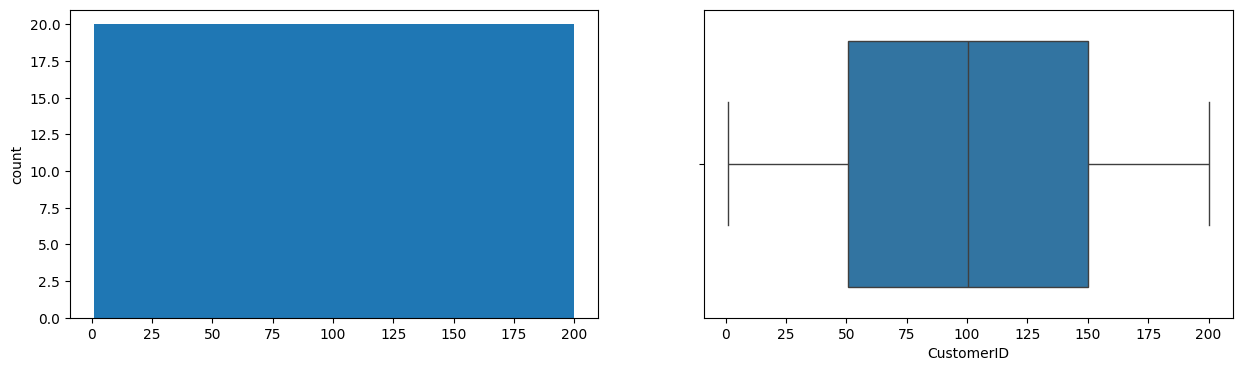

Age
Skew : 0.49


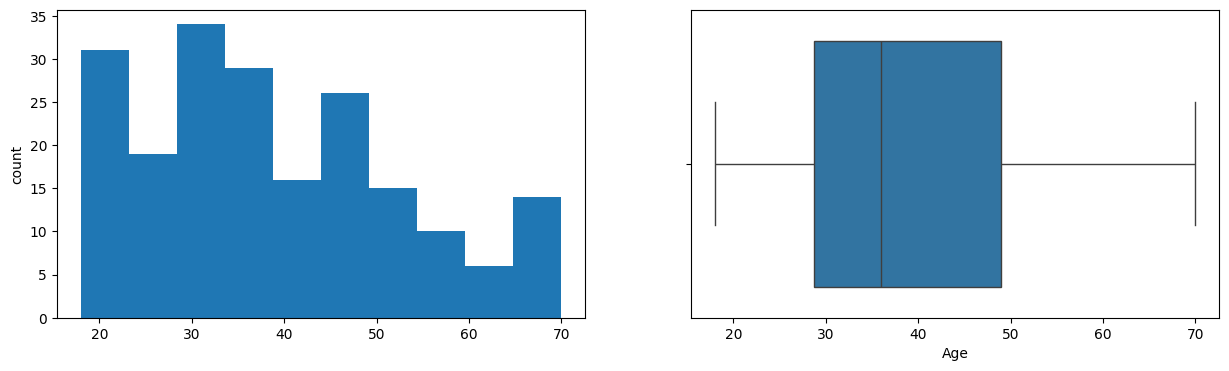

Annual Income (k$)
Skew : 0.32


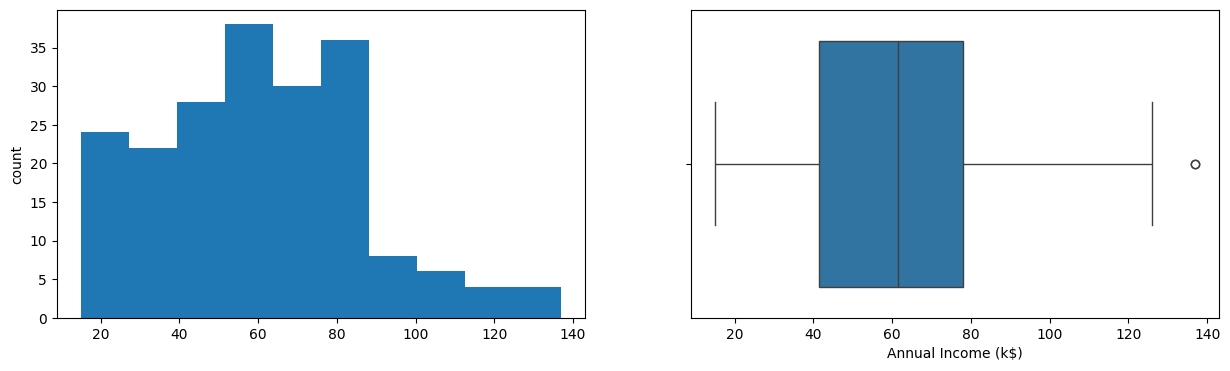

Spending Score (1-100)
Skew : -0.05


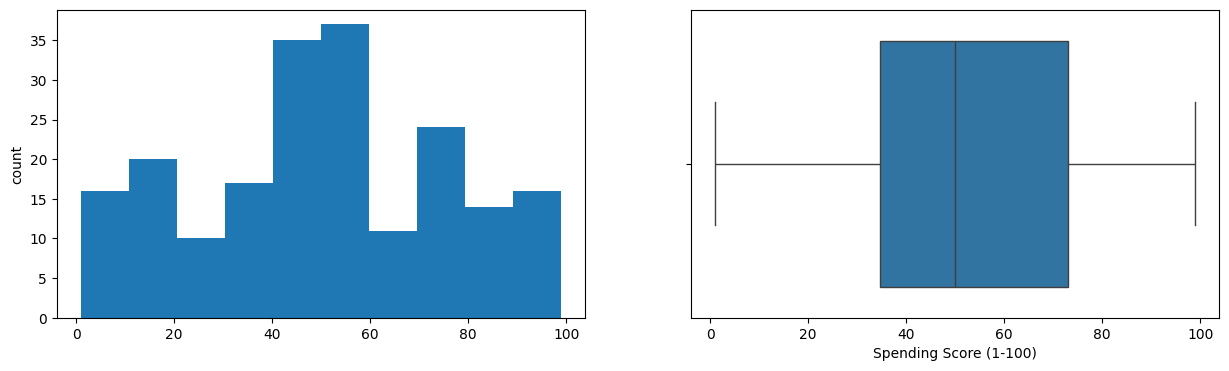

In [ ]:
cols=['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']

for col in cols:
    print(col)
    print('Skew :', round(df_train[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_train[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train[col])
    plt.show()

# Customer Segmentation

# **Non-hierarchical: k-means algorithm**

In [ ]:
x = df_train.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


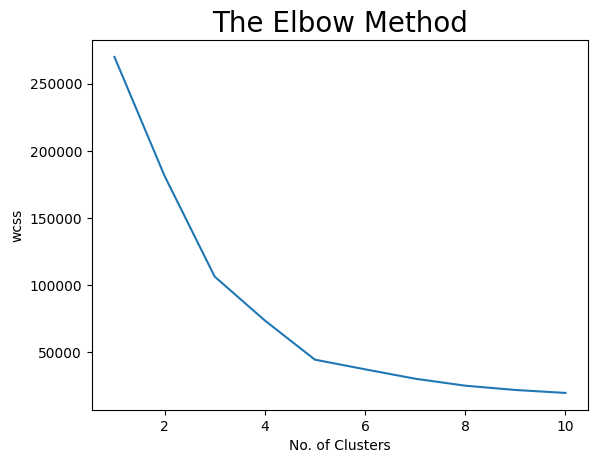

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Based on the elbow plot, the optimal number of centroids(k) to use in a k-means clustering algorithm is 5.

In [ ]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(x)
#predicting the labels of the input data
y=km1.predict(x)

# Assuming 'df_train' is the DataFrame you want to add labels to
df1 = df_train.copy() # Create a copy to avoid modifying the original
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


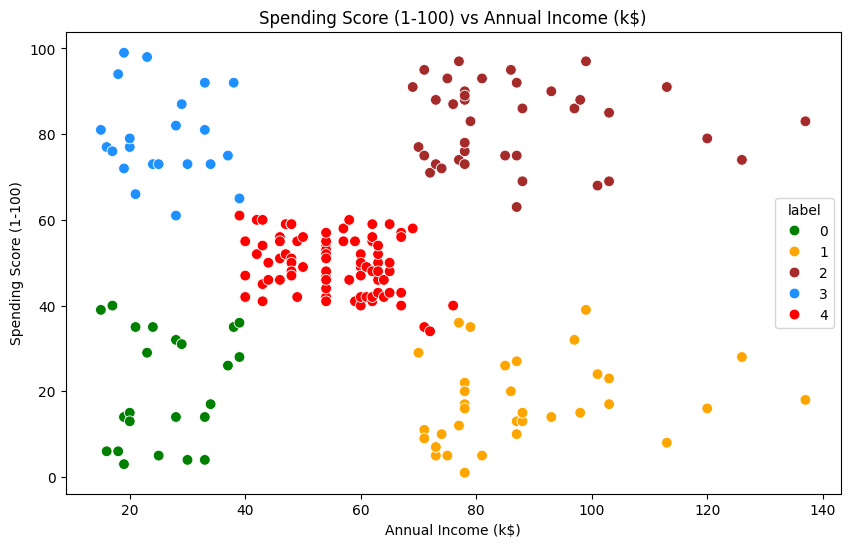

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

It is evident that the data has been segmented into five distinct clusters. The green cluster represents customers with the lowest income and spending scores, while the brown cluster signifies those with the highest income and spending scores.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data
data = df_train

# Create DataFrame
df = pd.DataFrame(df_train)

# Extract features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # Adjust n_clusters
df['Segment'] = kmeans.fit_predict(scaled_features)

# Count number of customers in each cluster
cluster_counts = df['Segment'].value_counts().sort_index()

# Print number of customers in each cluster
print("Number of customers in each cluster:\n", cluster_counts)

Number of customers in each cluster:
 Segment
0    47
1    39
2    40
3    20
4    54
Name: count, dtype: int64


We look at the frequency of allocations within each cluster. The first cluster has 47 observations, the second cluster has 39 observations and the third cluster has 40 observations, the fourth cluster has 20 observations and the last cluster has 54 observations.

# **Hierarchical**

## Euclidean distance metric

Number of observations in each cluster:
 1    21
2    23
3    85
4    39
5    32
Name: count, dtype: int64


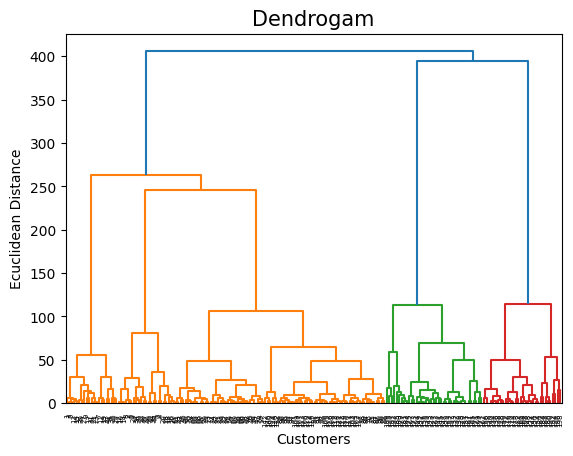

In [ ]:
import scipy.cluster.hierarchy as sch
num_clusters = 5

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 15)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
cluster_labels = sch.fcluster(sch.linkage(x, method='ward'), t=num_clusters, criterion='maxclust')

# Count the number of observations in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

# Print the number of observations in each cluster
print("Number of observations in each cluster:\n", cluster_counts)
plt.show()


## Manhattan or City block distance

Number of observations in each cluster:
 1    21
2    23
3    85
4    39
5    32
Name: count, dtype: int64


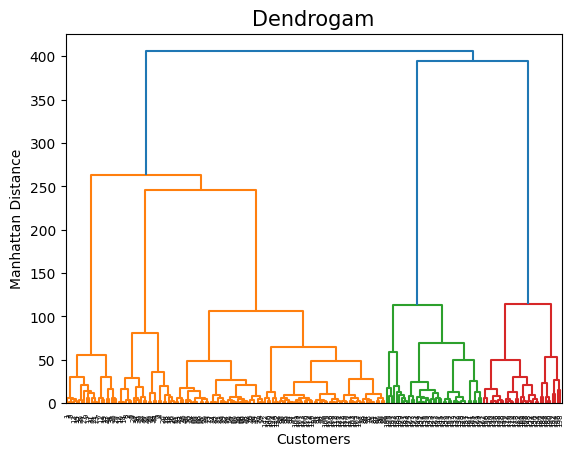

In [ ]:
import scipy.cluster.hierarchy as sch
num_clusters = 5

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 15)
plt.xlabel('Customers')
plt.ylabel('Manhattan Distance')
cluster_labels = sch.fcluster(sch.linkage(x, method='ward'), t=num_clusters, criterion='maxclust')

# Count the number of observations in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

# Print the number of observations in each cluster
print("Number of observations in each cluster:\n", cluster_counts)
plt.show()

## Correlation distance

Number of observations in each cluster:
 1    21
2    23
3    85
4    39
5    32
Name: count, dtype: int64


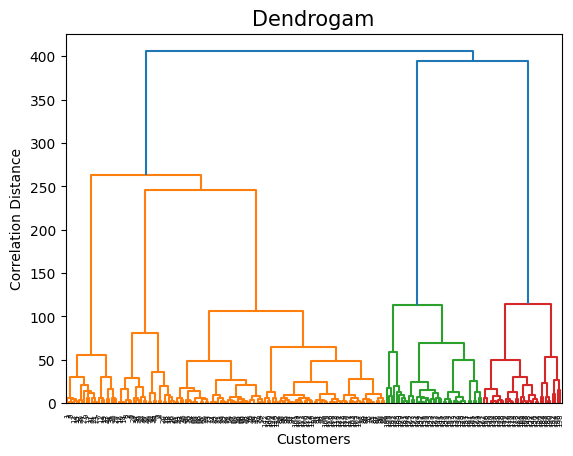

In [ ]:
import scipy.cluster.hierarchy as sch
num_clusters = 5

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 15)
plt.xlabel('Customers')
plt.ylabel('Correlation Distance')
cluster_labels = sch.fcluster(sch.linkage(x, method='ward'), t=num_clusters, criterion='maxclust')

# Count the number of observations in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

# Print the number of observations in each cluster
print("Number of observations in each cluster:\n", cluster_counts)
plt.show()

The analysis of clustering using various distance metrics reveals that distance metric clustering provides adequate separation of data.

# Cluster profiling

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)  # Adjust n_clusters
df['Segment'] = kmeans.fit_predict(scaled_features)
# Count number of customers in each cluster
cluster_counts = df['Segment'].value_counts().sort_index()

# Print number of customers in each cluster
print("Number of customers in each cluster:\n", cluster_counts)



Number of customers in each cluster:
 Segment
0    47
1    39
2    40
3    20
4    54
Name: count, dtype: int64


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

data = df_train[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X = pd.DataFrame(df_train)

# Perform KMeans clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(df_train[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


X['Clusters'] = kmeans.labels_


cluster_means = X.groupby('Clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_means)

                Age  Annual Income (k$)  Spending Score (1-100)
Clusters                                                       
0         45.217391           26.304348               20.913043
1         32.692308           86.538462               82.128205
2         43.088608           55.291139               49.569620
3         25.521739           26.304348               78.565217
4         40.666667           87.750000               17.583333


Based on the results of the averages, the customers can be profiled as follows:

Cluster 1: (47)  Low Spending Customers rates highly on age and low on income & spending score.

Cluster 2: (39) Solvent Customers as the means rate highly on income & spending score and moderatley on age.

Cluster 3: (40) Normal Customers as the means rate moderately on all 3 variables.

Cluster 4: (20) Splurging Customers as the means rate highly on spending score and low on age & income.

Cluster 5: (54) Priority Customers as the means rate highly on age & income and lowly on spending score.

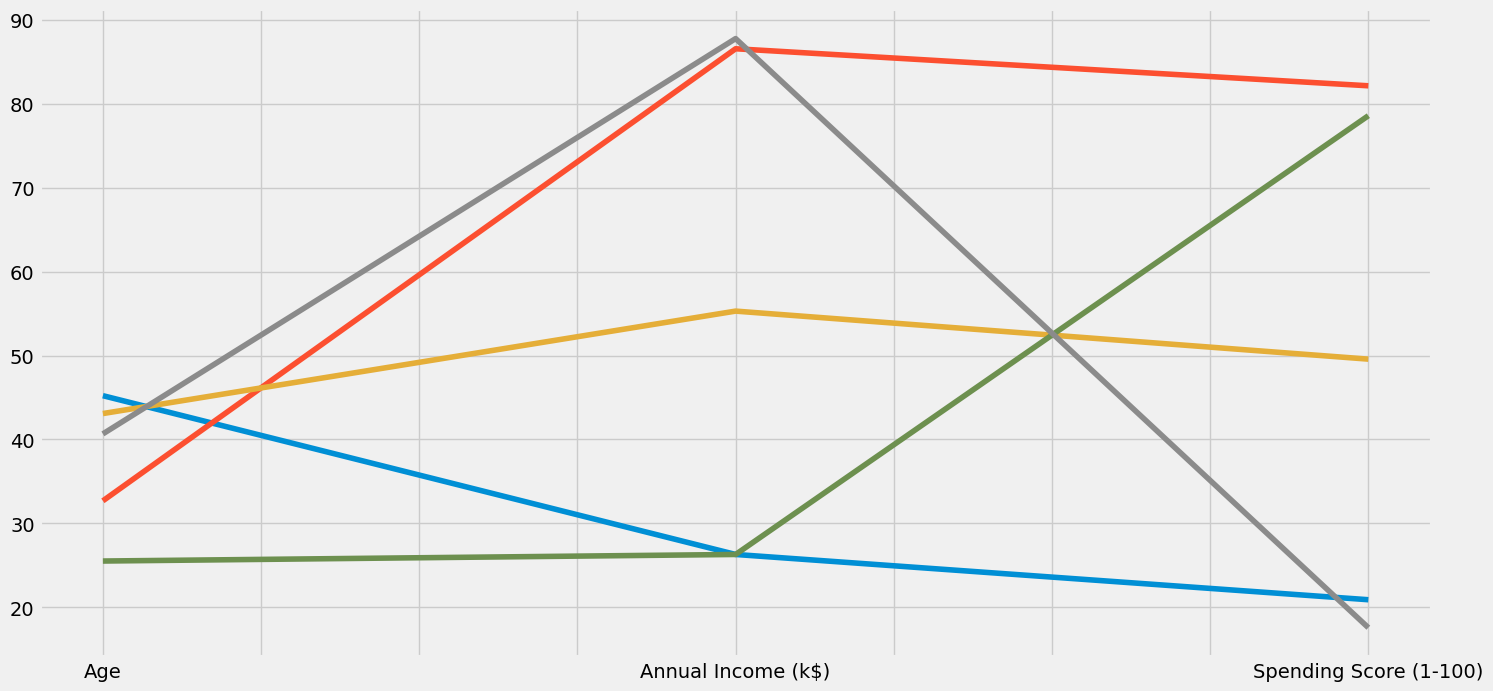

In [ ]:
cluster_means.iloc[0,:].plot()
cluster_means.iloc[1,:].plot()
cluster_means.iloc[2,:].plot()
cluster_means.iloc[3,:].plot()
cluster_means.iloc[4,:].plot()
plt.show()

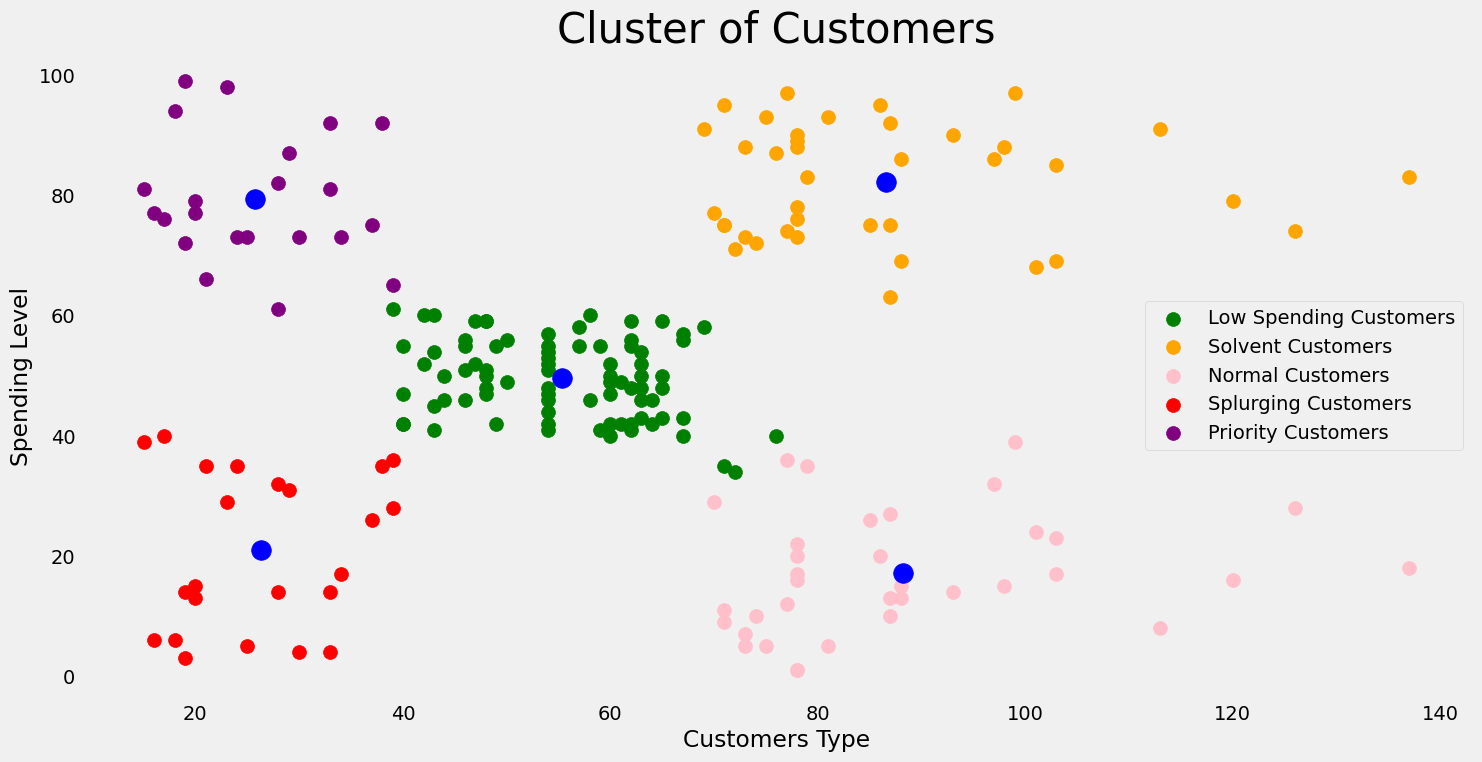

In [ ]:
!pip install scikit-learn  # Install scikit-learn if not already installed
from sklearn.cluster import KMeans # Import the KMeans class


df_train = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

data = df_train[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X = pd.DataFrame(df_train)

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (16, 8)
plt.title('Cluster of Customers', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'green', label = 'Low Spending Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Solvent Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'pink', label = 'Normal Customers')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Splurging Customers')
plt.scatter(x[ymeans == 4, 0], x[ymeans == 4, 1], s = 100, c = 'purple', label = 'Priority Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'blue')

plt.style.use('fivethirtyeight')
plt.xlabel('Customers Type')
plt.ylabel('Spending Level')
plt.legend()
plt.grid()
plt.show()

# Recommendations

Based on the results of the averages, the customers can be profiled as follows:

Cluster 1: (47)  Low Spending Customers rates highly on age and low on income & spending score.
Recommendation: Target older customers with deals and products that will suit their lower-income.

Cluster 2: (39) Solvent Customers as the means rate highly on income & spending score and moderatley on age.
Recommendation: Invest on marketing to this cluster as they are the mot stable customers who can spend more. Also invest in more high-quality products to as the income level is higher.

Cluster 3: (40) Normal Customers as the means rate moderately on all 3 variables.
Recommendation: Provide affordable products to cater to the middle-class customers.

Cluster 4: (20) Splurging Customers as the means rate highly on spending score and low on age & income.
Recommendation: Invest in trendy affordable products that will appeal to the the younger low income customers who enjoy a fun sale.

Cluster 5: (54) Priority Customers as the means rate highly on age & income and lowly on spending score.
Recommendation: Conduct market research to provide specific products to reach this demographic as it has potential to be a fiscal investment with more customers under this cluster.